# Exploratory Data Analysis (EDA)


## Introduction
This project showcases Exploratory Data Analysis (EDA) using pandas, matplotlib, and seaborn. A sample dataset is analyzed both qualitatively and quantitatively. 

NOTE: This project is based on an [Exploratory Data Analysis lab](https://www.coursera.org/learn/ibm-exploratory-data-analysis-for-machine-learning/ungradedLti/pPnDS/demo-lab-exploratory-data-analysis) from Coursera's course on Exploratory Data Analysis for Machine Learning. 


## Dataset

The iris data set `iris_data.csv` is used for this project. This is a well-known data set containing iris species and sepal and petal measurements.


## Set-Up

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')

## Data Loading and Qualitative Exploration

The data is loaded into a dataframe and analyzed qualitatively:
* `.head()` shows the first few rows of the data to provide insight on what information is available and what datatypes are expected
* the number of datapoints (i.e. rows) and column information (name and datatypes) are printed
* NOTE: `.info()` can also be used for the above, and would additionally show any missing values

String processing is applied to the species name to remove the leading "Iris-" in some entries. 

In [4]:
data = pd.read_csv("iris_data.csv")
 
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
num_points = len(data) # number of datapoints
print(f"The number of rows is {num_points}.") 

cols = data.columns.to_list() # column names
print("The column names are:")
print(cols)

print("The datatypes are:")
print(data.dtypes) # data types of columns

The number of rows is 150.
The column names are:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
The datatypes are:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [7]:
data["species"] = data["species"].apply(lambda x: x.replace("Iris-", ""))

## Quantitative Exploration

The following quantiative information of the dataset is outputted:
* number of each species present using `.value_counts`
* median, median, quantiles, and ranges for each petal and sepal measurement based on `.describe()`

In [8]:
print("The number of each species is:")
print(data["species"].value_counts())

# get mean, median, quantiles, ranges for each petal and sepal measurement
stats = data.describe() 
stats.loc["range"] = stats.loc["max"] - stats.loc["min"]
stats = stats.loc[["mean", "25%", "50%", "75%", "range"]]
stats.rename({"50%": "median"}, inplace=True)
print("The descriptive statistics are: ")
print(stats)

The number of each species is:
virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64
The descriptive statistics are: 
        sepal_length  sepal_width  petal_length  petal_width
mean        5.843333        3.054      3.758667     1.198667
25%         5.100000        2.800      1.600000     0.300000
median      5.800000        3.000      4.350000     1.300000
75%         6.400000        3.300      5.100000     1.800000
range       3.600000        2.400      5.900000     2.400000


The following quantitative information **for each species** is put into a dataframe using `.groupby()`:
* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width)
* The median of each of these measurements

In [9]:
per_species = data.groupby("species").agg(["mean", "median"])
print(per_species)

           sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0  


## PLOTTING

The data is visualized through the following plots:
* scatter plot of sepal length vs. width - this visualizes potential relationships between two measurements
* histogram of petal length - this visualizes the distribution of one of the measurements
* histogram of all measures, both overlaid in one graph and individually in subplots
* boxplots of each petal and sepal measurement grouped by species, both in one graph and individually in subplots
* pairplot to examine correlations between measurements

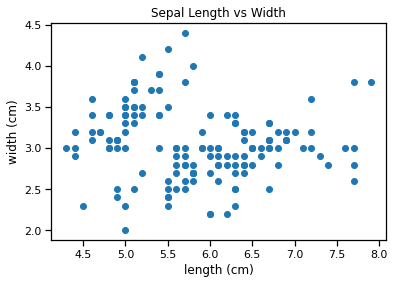

In [12]:
# sepal length vs width
plt.scatter(data["sepal_length"], data["sepal_width"])
plt.title("Sepal Length vs Width")
plt.xlabel("length (cm)")
plt.ylabel("width (cm)")
plt.show()

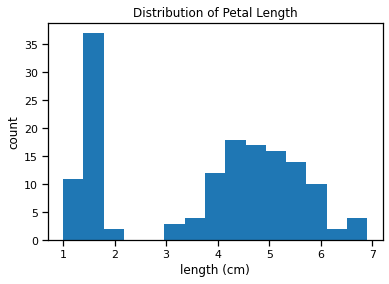

In [11]:
# histogram of petal length
plt.hist(data["petal_length"], bins=15)
plt.ylabel("count")
plt.xlabel("length (cm)")
plt.title("Distribution of Petal Length")
plt.show()

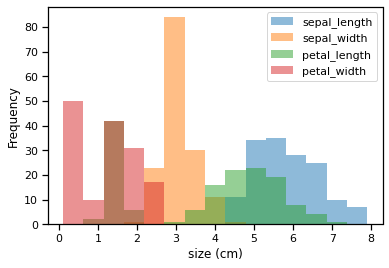

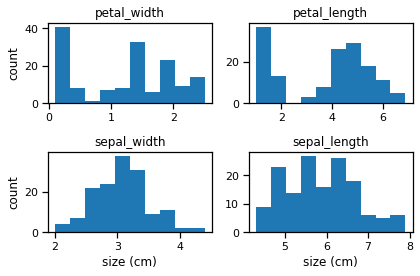

In [13]:
# create one histograms with all features
fig = data.plot.hist(bins=15, alpha=0.5)
fig.set_xlabel("size (cm)")

# create separate histograms of features in subplot
features = ["petal_width", "petal_length", "sepal_width", "sepal_length"]
fig, axs = plt.subplots(2, 2)
count = 0
for i in range(2):
    for j in range(2):
        col = features[count]
        axs[i, j].hist(data[col])
        axs[i, j].set_title(col)

        if j == 0:
            axs[i, j].set_ylabel("count")

        if i == 1:
            axs[i, j].set_xlabel("size (cm)")
        
        count = count + 1
plt.tight_layout() # auto-adjust padding
plt.show()

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

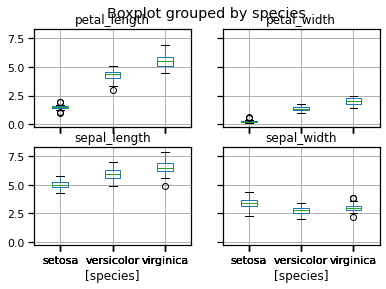

In [14]:
# boxplot of measures grouped by species
data.boxplot(by="species")

In [15]:
# melt dataframe to be a long format instead of wide format
data_melt = data.melt(id_vars=["species"]) 
data_melt.head()

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


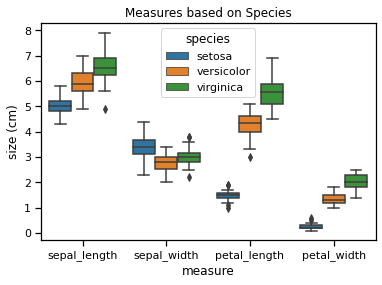

In [16]:
sns.boxplot(data=data_melt, x="variable", y="value", hue="species")
plt.xlabel("measure")
plt.ylabel("size (cm)")
plt.title("Measures based on Species")
plt.show()

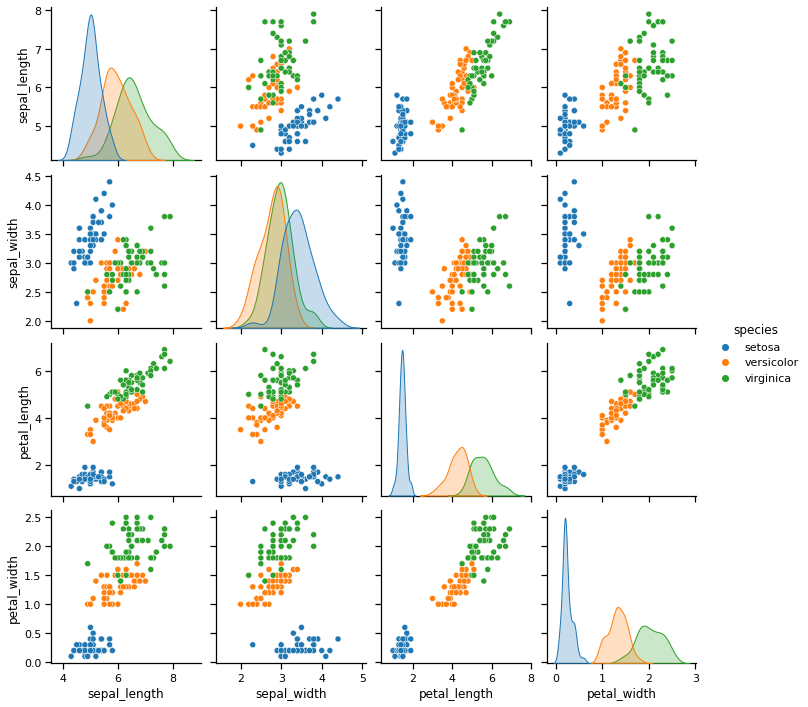

In [17]:
sns.pairplot(data, hue="species")
plt.show()

As can be seen from the figures, the measures related to petals and sepals can distinguish the species. 

---
### Machine Learning Foundation (C) 2020 IBM Corporation
